In [31]:
from sys import path as syspath
from os import path as ospath
syspath.append(ospath.join(ospath.expanduser("~"), '/data/hashemi/Freetime/Freetime-DQN/Deep-Freetime/SB3_f'))

In [32]:
import torch as torch
torch._C._cuda_getDeviceCount() > 0

True

In [33]:
import os
import gym 
import matplotlib.pyplot as plt
import numpy as np 
from SB3_f.sb3f import DQN
from SB3_f.sb3f.common.vec_env import DummyVecEnv
from SB3_f.sb3f.common.evaluation import evaluate_policy
from SB3_f.sb3f.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold


In [34]:
rewards = [[1,0,5]]
from GridEnv import WindyGridworld
env = WindyGridworld(
        height=20,
        width=11,
        rewards=rewards,
        wind=True,
        allowed_actions=['L', 'R', 'C'],
        reward_terminates_episode=False
    )

In [35]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

QObject::moveToThread: Current thread (0x56181cbcdc40) is not the object's thread (0x56181cb70ae0).
Cannot move to target thread (0x56181cbcdc40)

QObject::moveToThread: Current thread (0x56181cbcdc40) is not the object's thread (0x56181cb70ae0).
Cannot move to target thread (0x56181cbcdc40)

QObject::moveToThread: Current thread (0x56181cbcdc40) is not the object's thread (0x56181cb70ae0).
Cannot move to target thread (0x56181cbcdc40)

QObject::moveToThread: Current thread (0x56181cbcdc40) is not the object's thread (0x56181cb70ae0).
Cannot move to target thread (0x56181cbcdc40)

QObject::moveToThread: Current thread (0x56181cbcdc40) is not the object's thread (0x56181cb70ae0).
Cannot move to target thread (0x56181cbcdc40)

QObject::moveToThread: Current thread (0x56181cbcdc40) is not the object's thread (0x56181cb70ae0).
Cannot move to target thread (0x56181cbcdc40)

QObject::moveToThread: Current thread (0x56181cbcdc40) is not the object's thread (0x56181cb70ae0).
Cannot move to tar

Episode:1 Score:0
Episode:2 Score:1
Episode:3 Score:0
Episode:4 Score:0
Episode:5 Score:0


In [36]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs_F_Only', 'Env1')

In [37]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=2, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)
opt_val = None
opt_val

In [38]:
# Using same prams that performed optimally in Baseline
model = DQN('CnnPolicy', env, opt_val=opt_val, exploration_fraction=0.8,
    exploration_final_eps=0.1,learning_starts=100000,
    verbose = 1, 
    buffer_size = 50000,
    target_update_interval=1000,
    tensorboard_log=log_path)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


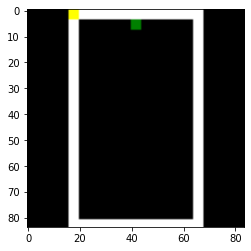

In [39]:
from SB3_f.sb3f.common.utils import obs_as_tensor
device = torch.device('cuda:0')

obs = env.canvas
plt.imshow(obs)


# Check the Network Q Value
observation = np.transpose(obs, (2, 0, 1))
observation = observation[np.newaxis, ...]
observation = obs_as_tensor(observation, device)
with torch.no_grad():
        q_values = model.q_net(observation)

In [40]:
model.learn(total_timesteps=1000000,callback=eval_callback, tb_log_name='Env1_Opt_0.8exp_1M')

Logging to Training/Logs_F_Only/Env1/Env1_Opt_0.8exp_1M_6
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9        |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2457     |
|    time_elapsed     | 0        |
|    total_timesteps  | 36       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 8        |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2492     |
|    time_elapsed     | 0        |
|    total_timesteps  | 64       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 0        |
|    exploration_rate | 1       

/data/hashemi/Freetime/Freetime-DQN/Deep-Freetime/SB3_f/sb3f/common/callbacks.py:388: UserWarning: Training and eval env are not of the same type<sb3f.common.vec_env.vec_transpose.VecTransposeImage object at 0x7f81b67e9640> != <sb3f.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f81b663ee50>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.0357   |
|    exploration_rate | 1        |
| time/               |          |
|    episodes         | 28       |
|    fps              | 2545     |
|    time_elapsed     | 0        |
|    total_timesteps  | 389      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.0312   |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 2543     |
|    time_elapsed     | 0        |
|    total_timesteps  | 461      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.0278   |
|    exploration_rate | 0.999    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes         | 116      |
|    fps              | 2673     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1549     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes         | 120      |
|    fps              | 2684     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1629     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.998    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 204      |
|    fps              | 2786     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2903     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 208      |
|    fps              | 2790     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2966     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes         | 292      |
|    fps              | 2770     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4172     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes         | 296      |
|    fps              | 2773     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4244     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.995    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 380      |
|    fps              | 2699     |
|    time_elapsed     | 2        |
|    total_timesteps  | 5407     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 384      |
|    fps              | 2697     |
|    time_elapsed     | 2        |
|    total_timesteps  | 5474     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 468      |
|    fps              | 2687     |
|    time_elapsed     | 2        |
|    total_timesteps  | 6763     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 472      |
|    fps              | 2689     |
|    time_elapsed     | 2        |
|    total_timesteps  | 6827     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 556      |
|    fps              | 2689     |
|    time_elapsed     | 3        |
|    total_timesteps  | 8110     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 560      |
|    fps              | 2693     |
|    time_elapsed     | 3        |
|    total_timesteps  | 8188     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes         | 644      |
|    fps              | 2735     |
|    time_elapsed     | 3        |
|    total_timesteps  | 9428     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes         | 648      |
|    fps              | 2736     |
|    time_elapsed     | 3        |
|    total_timesteps  | 9478     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 728      |
|    fps              | 2605     |
|    time_elapsed     | 4        |
|    total_timesteps  | 10675    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 732      |
|    fps              | 2607     |
|    time_elapsed     | 4        |
|    total_timesteps  | 10737    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.987    |
| time/               |          |
|    episodes         | 816      |
|    fps              | 2603     |
|    time_elapsed     | 4        |
|    total_timesteps  | 11946    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.987    |
| time/               |          |
|    episodes         | 820      |
|    fps              | 2604     |
|    time_elapsed     | 4        |
|    total_timesteps  | 11998    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes         | 904      |
|    fps              | 2612     |
|    time_elapsed     | 5        |
|    total_timesteps  | 13205    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes         | 908      |
|    fps              | 2613     |
|    time_elapsed     | 5        |
|    total_timesteps  | 13260    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.984    |
| time/               |          |
|    episodes         | 992      |
|    fps              | 2624     |
|    time_elapsed     | 5        |
|    total_timesteps  | 14455    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.984    |
| time/               |          |
|    episodes         | 996      |
|    fps              | 2623     |
|    time_elapsed     | 5        |
|    total_timesteps  | 14481    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.984    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes         | 1080     |
|    fps              | 2652     |
|    time_elapsed     | 5        |
|    total_timesteps  | 15737    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes         | 1084     |
|    fps              | 2653     |
|    time_elapsed     | 5        |
|    total_timesteps  | 15796    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 1168     |
|    fps              | 2672     |
|    time_elapsed     | 6        |
|    total_timesteps  | 17045    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes         | 1172     |
|    fps              | 2673     |
|    time_elapsed     | 6        |
|    total_timesteps  | 17107    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.981    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.979    |
| time/               |          |
|    episodes         | 1256     |
|    fps              | 2686     |
|    time_elapsed     | 6        |
|    total_timesteps  | 18412    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.979    |
| time/               |          |
|    episodes         | 1260     |
|    fps              | 2687     |
|    time_elapsed     | 6        |
|    total_timesteps  | 18488    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.979    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.978    |
| time/               |          |
|    episodes         | 1344     |
|    fps              | 2685     |
|    time_elapsed     | 7        |
|    total_timesteps  | 19620    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.978    |
| time/               |          |
|    episodes         | 1348     |
|    fps              | 2684     |
|    time_elapsed     | 7        |
|    total_timesteps  | 19681    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.978    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.977    |
| time/               |          |
|    episodes         | 1428     |
|    fps              | 2672     |
|    time_elapsed     | 7        |
|    total_timesteps  | 20829    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.976    |
| time/               |          |
|    episodes         | 1432     |
|    fps              | 2673     |
|    time_elapsed     | 7        |
|    total_timesteps  | 20897    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.15     |
|    exploration_rate | 0.976    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 1516     |
|    fps              | 2661     |
|    time_elapsed     | 8        |
|    total_timesteps  | 22100    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes         | 1520     |
|    fps              | 2662     |
|    time_elapsed     | 8        |
|    total_timesteps  | 22167    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.975    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 1604     |
|    fps              | 2659     |
|    time_elapsed     | 8        |
|    total_timesteps  | 23362    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 1608     |
|    fps              | 2658     |
|    time_elapsed     | 8        |
|    total_timesteps  | 23411    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 1692     |
|    fps              | 2646     |
|    time_elapsed     | 9        |
|    total_timesteps  | 24660    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes         | 1696     |
|    fps              | 2645     |
|    time_elapsed     | 9        |
|    total_timesteps  | 24720    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.972    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes         | 1780     |
|    fps              | 2658     |
|    time_elapsed     | 9        |
|    total_timesteps  | 25845    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes         | 1784     |
|    fps              | 2659     |
|    time_elapsed     | 9        |
|    total_timesteps  | 25905    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.971    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 1868     |
|    fps              | 2659     |
|    time_elapsed     | 10       |
|    total_timesteps  | 27138    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 1872     |
|    fps              | 2659     |
|    time_elapsed     | 10       |
|    total_timesteps  | 27211    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 1956     |
|    fps              | 2651     |
|    time_elapsed     | 10       |
|    total_timesteps  | 28440    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes         | 1960     |
|    fps              | 2651     |
|    time_elapsed     | 10       |
|    total_timesteps  | 28512    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.968    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 2044     |
|    fps              | 2643     |
|    time_elapsed     | 11       |
|    total_timesteps  | 29757    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes         | 2048     |
|    fps              | 2643     |
|    time_elapsed     | 11       |
|    total_timesteps  | 29818    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.966    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.965    |
| time/               |          |
|    episodes         | 2128     |
|    fps              | 2618     |
|    time_elapsed     | 11       |
|    total_timesteps  | 30972    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.965    |
| time/               |          |
|    episodes         | 2132     |
|    fps              | 2617     |
|    time_elapsed     | 11       |
|    total_timesteps  | 31020    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.965    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes         | 2216     |
|    fps              | 2615     |
|    time_elapsed     | 12       |
|    total_timesteps  | 32248    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes         | 2220     |
|    fps              | 2615     |
|    time_elapsed     | 12       |
|    total_timesteps  | 32284    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.964    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 2304     |
|    fps              | 2610     |
|    time_elapsed     | 12       |
|    total_timesteps  | 33513    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 2308     |
|    fps              | 2610     |
|    time_elapsed     | 12       |
|    total_timesteps  | 33575    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.961    |
| time/               |          |
|    episodes         | 2392     |
|    fps              | 2607     |
|    time_elapsed     | 13       |
|    total_timesteps  | 34780    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.961    |
| time/               |          |
|    episodes         | 2396     |
|    fps              | 2607     |
|    time_elapsed     | 13       |
|    total_timesteps  | 34860    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.961    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.959    |
| time/               |          |
|    episodes         | 2480     |
|    fps              | 2604     |
|    time_elapsed     | 13       |
|    total_timesteps  | 36190    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.959    |
| time/               |          |
|    episodes         | 2484     |
|    fps              | 2604     |
|    time_elapsed     | 13       |
|    total_timesteps  | 36253    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.959    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.958    |
| time/               |          |
|    episodes         | 2568     |
|    fps              | 2601     |
|    time_elapsed     | 14       |
|    total_timesteps  | 37462    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.958    |
| time/               |          |
|    episodes         | 2572     |
|    fps              | 2600     |
|    time_elapsed     | 14       |
|    total_timesteps  | 37516    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.958    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 2656     |
|    fps              | 2596     |
|    time_elapsed     | 14       |
|    total_timesteps  | 38784    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes         | 2660     |
|    fps              | 2596     |
|    time_elapsed     | 14       |
|    total_timesteps  | 38832    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.956    |
| time/               |          |
|    episodes       

Eval num_timesteps=40000, episode_reward=0.00 +/- 0.00
Episode length: 7.60 +/- 1.85
----------------------------------
| eval/               |          |
|    mean_ep_length   | 7.6      |
|    mean_reward      | 0        |
| rollout/            |          |
|    exploration_rate | 0.955    |
| time/               |          |
|    total_timesteps  | 40000    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.955    |
| time/               |          |
|    episodes         | 2744     |
|    fps              | 2577     |
|    time_elapsed     | 15       |
|    total_timesteps  | 40034    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.955    |
| time/               |          |
|    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes         | 2828     |
|    fps              | 2575     |
|    time_elapsed     | 15       |
|    total_timesteps  | 41129    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes         | 2832     |
|    fps              | 2575     |
|    time_elapsed     | 15       |
|    total_timesteps  | 41174    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.954    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.952    |
| time/               |          |
|    episodes         | 2916     |
|    fps              | 2575     |
|    time_elapsed     | 16       |
|    total_timesteps  | 42360    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.952    |
| time/               |          |
|    episodes         | 2920     |
|    fps              | 2575     |
|    time_elapsed     | 16       |
|    total_timesteps  | 42387    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.952    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.951    |
| time/               |          |
|    episodes         | 3004     |
|    fps              | 2577     |
|    time_elapsed     | 16       |
|    total_timesteps  | 43627    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.951    |
| time/               |          |
|    episodes         | 3008     |
|    fps              | 2577     |
|    time_elapsed     | 16       |
|    total_timesteps  | 43672    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.951    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.95     |
| time/               |          |
|    episodes         | 3092     |
|    fps              | 2574     |
|    time_elapsed     | 17       |
|    total_timesteps  | 44883    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.12     |
|    exploration_rate | 0.949    |
| time/               |          |
|    episodes         | 3096     |
|    fps              | 2574     |
|    time_elapsed     | 17       |
|    total_timesteps  | 44962    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.949    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.948    |
| time/               |          |
|    episodes         | 3180     |
|    fps              | 2580     |
|    time_elapsed     | 17       |
|    total_timesteps  | 46212    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.948    |
| time/               |          |
|    episodes         | 3184     |
|    fps              | 2581     |
|    time_elapsed     | 17       |
|    total_timesteps  | 46274    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.948    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.947    |
| time/               |          |
|    episodes         | 3268     |
|    fps              | 2593     |
|    time_elapsed     | 18       |
|    total_timesteps  | 47526    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.946    |
| time/               |          |
|    episodes         | 3272     |
|    fps              | 2594     |
|    time_elapsed     | 18       |
|    total_timesteps  | 47606    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.946    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes         | 3356     |
|    fps              | 2604     |
|    time_elapsed     | 18       |
|    total_timesteps  | 48697    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.03     |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes         | 3360     |
|    fps              | 2604     |
|    time_elapsed     | 18       |
|    total_timesteps  | 48750    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.02     |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.944    |
| time/               |          |
|    episodes         | 3444     |
|    fps              | 2605     |
|    time_elapsed     | 19       |
|    total_timesteps  | 49939    |
----------------------------------
Eval num_timesteps=50000, episode_reward=0.00 +/- 0.00
Episode length: 5.20 +/- 2.56
----------------------------------
| eval/               |          |
|    mean_ep_length   | 5.2      |
|    mean_reward      | 0        |
| rollout/            |          |
|    exploration_rate | 0.944    |
| time/               |          |
|    total_timesteps  | 50000    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.944    |
| time/               |          |
|    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes         | 3528     |
|    fps              | 2596     |
|    time_elapsed     | 19       |
|    total_timesteps  | 51143    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes         | 3532     |
|    fps              | 2595     |
|    time_elapsed     | 19       |
|    total_timesteps  | 51207    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.942    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes         | 3616     |
|    fps              | 2598     |
|    time_elapsed     | 20       |
|    total_timesteps  | 52523    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes         | 3620     |
|    fps              | 2599     |
|    time_elapsed     | 20       |
|    total_timesteps  | 52564    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 3704     |
|    fps              | 2597     |
|    time_elapsed     | 20       |
|    total_timesteps  | 53899    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes         | 3708     |
|    fps              | 2597     |
|    time_elapsed     | 20       |
|    total_timesteps  | 53979    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.939    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes         | 3792     |
|    fps              | 2595     |
|    time_elapsed     | 21       |
|    total_timesteps  | 55160    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes         | 3796     |
|    fps              | 2595     |
|    time_elapsed     | 21       |
|    total_timesteps  | 55218    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.937    |
| time/               |          |
|    episodes         | 3880     |
|    fps              | 2588     |
|    time_elapsed     | 21       |
|    total_timesteps  | 56436    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes         | 3884     |
|    fps              | 2588     |
|    time_elapsed     | 21       |
|    total_timesteps  | 56497    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.935    |
| time/               |          |
|    episodes         | 3968     |
|    fps              | 2588     |
|    time_elapsed     | 22       |
|    total_timesteps  | 57713    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.935    |
| time/               |          |
|    episodes         | 3972     |
|    fps              | 2589     |
|    time_elapsed     | 22       |
|    total_timesteps  | 57770    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.935    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.934    |
| time/               |          |
|    episodes         | 4056     |
|    fps              | 2588     |
|    time_elapsed     | 22       |
|    total_timesteps  | 58989    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.934    |
| time/               |          |
|    episodes         | 4060     |
|    fps              | 2588     |
|    time_elapsed     | 22       |
|    total_timesteps  | 59062    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.932    |
| time/               |          |
|    episodes         | 4140     |
|    fps              | 2588     |
|    time_elapsed     | 23       |
|    total_timesteps  | 60316    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.932    |
| time/               |          |
|    episodes         | 4144     |
|    fps              | 2588     |
|    time_elapsed     | 23       |
|    total_timesteps  | 60377    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.932    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.931    |
| time/               |          |
|    episodes         | 4228     |
|    fps              | 2592     |
|    time_elapsed     | 23       |
|    total_timesteps  | 61599    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.931    |
| time/               |          |
|    episodes         | 4232     |
|    fps              | 2592     |
|    time_elapsed     | 23       |
|    total_timesteps  | 61661    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.931    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.929    |
| time/               |          |
|    episodes         | 4316     |
|    fps              | 2603     |
|    time_elapsed     | 24       |
|    total_timesteps  | 62886    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.929    |
| time/               |          |
|    episodes         | 4320     |
|    fps              | 2603     |
|    time_elapsed     | 24       |
|    total_timesteps  | 62931    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.929    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 4404     |
|    fps              | 2609     |
|    time_elapsed     | 24       |
|    total_timesteps  | 64155    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 4408     |
|    fps              | 2609     |
|    time_elapsed     | 24       |
|    total_timesteps  | 64223    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes         | 4492     |
|    fps              | 2609     |
|    time_elapsed     | 25       |
|    total_timesteps  | 65492    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes         | 4496     |
|    fps              | 2609     |
|    time_elapsed     | 25       |
|    total_timesteps  | 65541    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.926    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 4580     |
|    fps              | 2611     |
|    time_elapsed     | 25       |
|    total_timesteps  | 66747    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 4584     |
|    fps              | 2611     |
|    time_elapsed     | 25       |
|    total_timesteps  | 66808    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.923    |
| time/               |          |
|    episodes         | 4668     |
|    fps              | 2615     |
|    time_elapsed     | 26       |
|    total_timesteps  | 68042    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.923    |
| time/               |          |
|    episodes         | 4672     |
|    fps              | 2615     |
|    time_elapsed     | 26       |
|    total_timesteps  | 68100    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.923    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 4756     |
|    fps              | 2618     |
|    time_elapsed     | 26       |
|    total_timesteps  | 69332    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 4760     |
|    fps              | 2618     |
|    time_elapsed     | 26       |
|    total_timesteps  | 69403    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.921    |
| time/               |          |
|    episodes         | 4840     |
|    fps              | 2619     |
|    time_elapsed     | 26       |
|    total_timesteps  | 70664    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.13     |
|    exploration_rate | 0.92     |
| time/               |          |
|    episodes         | 4844     |
|    fps              | 2620     |
|    time_elapsed     | 26       |
|    total_timesteps  | 70722    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 0.14     |
|    exploration_rate | 0.92     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.919    |
| time/               |          |
|    episodes         | 4928     |
|    fps              | 2622     |
|    time_elapsed     | 27       |
|    total_timesteps  | 71892    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.919    |
| time/               |          |
|    episodes         | 4932     |
|    fps              | 2622     |
|    time_elapsed     | 27       |
|    total_timesteps  | 71956    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.919    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.918    |
| time/               |          |
|    episodes         | 5016     |
|    fps              | 2630     |
|    time_elapsed     | 27       |
|    total_timesteps  | 73204    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.918    |
| time/               |          |
|    episodes         | 5020     |
|    fps              | 2630     |
|    time_elapsed     | 27       |
|    total_timesteps  | 73268    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.918    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 5104     |
|    fps              | 2633     |
|    time_elapsed     | 28       |
|    total_timesteps  | 74523    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 5108     |
|    fps              | 2633     |
|    time_elapsed     | 28       |
|    total_timesteps  | 74568    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes         | 5192     |
|    fps              | 2640     |
|    time_elapsed     | 28       |
|    total_timesteps  | 75799    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes         | 5196     |
|    fps              | 2641     |
|    time_elapsed     | 28       |
|    total_timesteps  | 75862    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.913    |
| time/               |          |
|    episodes         | 5280     |
|    fps              | 2646     |
|    time_elapsed     | 29       |
|    total_timesteps  | 77153    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.913    |
| time/               |          |
|    episodes         | 5284     |
|    fps              | 2646     |
|    time_elapsed     | 29       |
|    total_timesteps  | 77228    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.913    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes         | 5368     |
|    fps              | 2649     |
|    time_elapsed     | 29       |
|    total_timesteps  | 78381    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes         | 5372     |
|    fps              | 2649     |
|    time_elapsed     | 29       |
|    total_timesteps  | 78442    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.91     |
| time/               |          |
|    episodes         | 5456     |
|    fps              | 2654     |
|    time_elapsed     | 30       |
|    total_timesteps  | 79671    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.91     |
| time/               |          |
|    episodes         | 5460     |
|    fps              | 2654     |
|    time_elapsed     | 30       |
|    total_timesteps  | 79728    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.91     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 5540     |
|    fps              | 2656     |
|    time_elapsed     | 30       |
|    total_timesteps  | 80962    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 5544     |
|    fps              | 2656     |
|    time_elapsed     | 30       |
|    total_timesteps  | 81026    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.907    |
| time/               |          |
|    episodes         | 5628     |
|    fps              | 2653     |
|    time_elapsed     | 31       |
|    total_timesteps  | 82288    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.907    |
| time/               |          |
|    episodes         | 5632     |
|    fps              | 2653     |
|    time_elapsed     | 31       |
|    total_timesteps  | 82365    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.907    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.906    |
| time/               |          |
|    episodes         | 5716     |
|    fps              | 2658     |
|    time_elapsed     | 31       |
|    total_timesteps  | 83643    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.906    |
| time/               |          |
|    episodes         | 5720     |
|    fps              | 2659     |
|    time_elapsed     | 31       |
|    total_timesteps  | 83720    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.906    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.904    |
| time/               |          |
|    episodes         | 5804     |
|    fps              | 2663     |
|    time_elapsed     | 31       |
|    total_timesteps  | 84956    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.904    |
| time/               |          |
|    episodes         | 5808     |
|    fps              | 2663     |
|    time_elapsed     | 31       |
|    total_timesteps  | 85013    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.904    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.903    |
| time/               |          |
|    episodes         | 5892     |
|    fps              | 2661     |
|    time_elapsed     | 32       |
|    total_timesteps  | 86215    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.903    |
| time/               |          |
|    episodes         | 5896     |
|    fps              | 2660     |
|    time_elapsed     | 32       |
|    total_timesteps  | 86291    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.903    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.901    |
| time/               |          |
|    episodes         | 5980     |
|    fps              | 2656     |
|    time_elapsed     | 32       |
|    total_timesteps  | 87593    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.901    |
| time/               |          |
|    episodes         | 5984     |
|    fps              | 2656     |
|    time_elapsed     | 32       |
|    total_timesteps  | 87628    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.901    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.9      |
| time/               |          |
|    episodes         | 6068     |
|    fps              | 2658     |
|    time_elapsed     | 33       |
|    total_timesteps  | 88841    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.9      |
| time/               |          |
|    episodes         | 6072     |
|    fps              | 2658     |
|    time_elapsed     | 33       |
|    total_timesteps  | 88886    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.9      |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.899    |
| time/               |          |
|    episodes         | 6156     |
|    fps              | 2661     |
|    time_elapsed     | 33       |
|    total_timesteps  | 89991    |
----------------------------------
Eval num_timesteps=90000, episode_reward=0.00 +/- 0.00
Episode length: 4.80 +/- 2.99
----------------------------------
| eval/               |          |
|    mean_ep_length   | 4.8      |
|    mean_reward      | 0        |
| rollout/            |          |
|    exploration_rate | 0.899    |
| time/               |          |
|    total_timesteps  | 90000    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.899    |
| time/               |          |
|    

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes         | 6240     |
|    fps              | 2655     |
|    time_elapsed     | 34       |
|    total_timesteps  | 91145    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes         | 6244     |
|    fps              | 2655     |
|    time_elapsed     | 34       |
|    total_timesteps  | 91191    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.897    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.896    |
| time/               |          |
|    episodes         | 6328     |
|    fps              | 2653     |
|    time_elapsed     | 34       |
|    total_timesteps  | 92417    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.896    |
| time/               |          |
|    episodes         | 6332     |
|    fps              | 2653     |
|    time_elapsed     | 34       |
|    total_timesteps  | 92481    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.896    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.895    |
| time/               |          |
|    episodes         | 6416     |
|    fps              | 2655     |
|    time_elapsed     | 35       |
|    total_timesteps  | 93703    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.895    |
| time/               |          |
|    episodes         | 6420     |
|    fps              | 2655     |
|    time_elapsed     | 35       |
|    total_timesteps  | 93771    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.894    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes         | 6504     |
|    fps              | 2653     |
|    time_elapsed     | 35       |
|    total_timesteps  | 94921    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes         | 6508     |
|    fps              | 2653     |
|    time_elapsed     | 35       |
|    total_timesteps  | 94986    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 0.11     |
|    exploration_rate | 0.893    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.892    |
| time/               |          |
|    episodes         | 6592     |
|    fps              | 2657     |
|    time_elapsed     | 36       |
|    total_timesteps  | 96299    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.892    |
| time/               |          |
|    episodes         | 6596     |
|    fps              | 2657     |
|    time_elapsed     | 36       |
|    total_timesteps  | 96371    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.04     |
|    exploration_rate | 0.892    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes         | 6680     |
|    fps              | 2655     |
|    time_elapsed     | 36       |
|    total_timesteps  | 97656    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes         | 6684     |
|    fps              | 2655     |
|    time_elapsed     | 36       |
|    total_timesteps  | 97693    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.05     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.889    |
| time/               |          |
|    episodes         | 6768     |
|    fps              | 2653     |
|    time_elapsed     | 37       |
|    total_timesteps  | 98807    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.889    |
| time/               |          |
|    episodes         | 6772     |
|    fps              | 2653     |
|    time_elapsed     | 37       |
|    total_timesteps  | 98848    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 0.09     |
|    exploration_rate | 0.889    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.887    |
| time/               |          |
|    episodes         | 6852     |
|    fps              | 2629     |
|    time_elapsed     | 38       |
|    total_timesteps  | 100086   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.62e-05 |
|    n_updates        | 21       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.887    |
| time/               |          |
|    episodes         | 6856     |
|    fps              | 2619     |
|    time_elapsed     | 38       |
|    total_timesteps  | 100137   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes         | 6916     |
|    fps              | 2470     |
|    time_elapsed     | 40       |
|    total_timesteps  | 101048   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.23e-05 |
|    n_updates        | 261      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 0.1      |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes         | 6920     |
|    fps              | 2462     |
|    time_elapsed     | 41       |
|    total_timesteps  | 101100   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.71e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.885    |
| time/               |          |
|    episodes         | 6980     |
|    fps              | 2345     |
|    time_elapsed     | 43       |
|    total_timesteps  | 101984   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.86e-05 |
|    n_updates        | 495      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 0.08     |
|    exploration_rate | 0.885    |
| time/               |          |
|    episodes         | 6984     |
|    fps              | 2336     |
|    time_elapsed     | 43       |
|    total_timesteps  | 102044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.52e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.884    |
| time/               |          |
|    episodes         | 7044     |
|    fps              | 2241     |
|    time_elapsed     | 45       |
|    total_timesteps  | 102963   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.95e-05 |
|    n_updates        | 740      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.884    |
| time/               |          |
|    episodes         | 7048     |
|    fps              | 2232     |
|    time_elapsed     | 46       |
|    total_timesteps  | 103043   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.61e-05 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 0.07     |
|    exploration_rate | 0.883    |
| time/               |          |
|    episodes         | 7108     |
|    fps              | 2152     |
|    time_elapsed     | 48       |
|    total_timesteps  | 103895   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.09e-05 |
|    n_updates        | 973      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 0.06     |
|    exploration_rate | 0.883    |
| time/               |          |
|    episodes         | 7112     |
|    fps              | 2147     |
|    time_elapsed     | 48       |
|    total_timesteps  | 103952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0289   |
|    n_updates      

KeyboardInterrupt: 

In [ ]:
save_path = os.path.join('Training', 'Saved Models', 'Env1_Freetime_Pess')
model.save(save_path)

In [ ]:
import numpy as np
from GridEnv import *
import torch as th
from stable_baselines3.common.utils import obs_as_tensor
device = th.device('cuda:0')

def Network_Qtable(model, env):

    device = th.device('cuda:0')

    # Genereate Image for each state, maybe dict{state: img}
    env_w = 11
    env_l = 20

    w = 0
    # Loop width of env
    state_img_dict = dict()
    while w < env_w:
        l = 0
        # Loop height of env
        while l < env_l:

            env.set_pos(l, w)
            img = visualize(env)
            state_img_dict[(l, w)] = img

            l += 1

        w += 1

    img = np.ones((20, 11))

    for key in state_img_dict.keys():
        state = key
        obs = state_img_dict[key]

        observation = np.transpose(obs, (2, 0, 1))
        observation = observation[np.newaxis, ...]
        observation = obs_as_tensor(observation, device)
        with th.no_grad():
            q_values = model.q_net(observation)

        max_val = np.max(q_values.cpu().detach().numpy())

        img[state[0], state[1]] = max_val

    return img

def Network_Ftable(model, env, type = "max"):

    device = th.device('cuda:0')

    # Genereate Image for each state, maybe dict{state: img}
    env_w = 11
    env_l = 20

    w = 0
    # Loop width of env
    state_img_dict = dict()
    while w < env_w:
        l = 0
        # Loop height of env
        while l < env_l:

            env.set_pos(l, w)
            img = visualize(env)
            state_img_dict[(l, w)] = img

            l += 1

        w += 1

    img = np.ones((20, 11))

    for key in state_img_dict.keys():
        state = key
        obs = state_img_dict[key]

        observation = np.transpose(obs, (2, 0, 1))
        observation = observation[np.newaxis, ...]
        observation = obs_as_tensor(observation, device)
        with th.no_grad():
            q_values = model.f_net(observation)
        
        if type == 'max':
            max_val = np.max(q_values.cpu().detach().numpy())
        else:
            max_val = np.min(q_values.cpu().detach().numpy())

        img[state[0], state[1]] = max_val

    return img

In [ ]:

final_table = Network_Qtable(model, env)
plt.imshow(final_table, cmap='jet')
plt.title("Env " + "1" + " F Only End")
plt.colorbar()
img_save_path = os.path.join('Q-Plot', "Env " + "1" + " F Pess")
plt.savefig(img_save_path)


In [ ]:
final_table = Network_Ftable(model, env, "max")
plt.imshow(final_table, cmap='jet')
plt.title("Env " + "1" + " F-table")
plt.colorbar()
img_save_path = os.path.join('Q-Plot', "Env " + "1" + " F-table(Pess)")
plt.savefig(img_save_path)

In [ ]:

final_table = Network_Ftable(model, env, "min")
plt.imshow(final_table, cmap='jet')
plt.title("Env " + "1" + " F-table")
plt.colorbar()
img_save_path = os.path.join('Q-Plot', "Env " + "1" + " F-table min(pess)")
plt.savefig(img_save_path)